# Download data

Data available via scikit-learn

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

(150, 2)


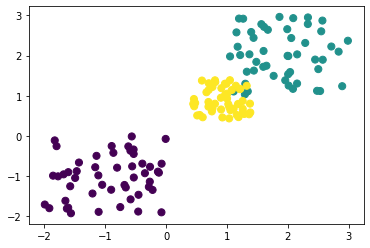

(198, 389)
(198, 384)


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
##### clustering (unsupervised/descrete) ####
# random generated data  
# Generating 3 destinct cluster, 2 of them slightly overlapping
X = -2 * np.random.rand(50,2)
X1 = 1 + 2 * np.random.rand(50,2)
X2 = 0.4 + np.random.rand(50,2)

X = np.append(X,X1,axis=0)
X = np.append(X,X2,axis=0)
colors = [0]*50+[1]*50+[2]*50
# === PLOTTING DATA
print(X.shape)
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = colors)
plt.show()
# ===

# gene expression
nci60 = pd.read_csv('data/NCI60.txt',sep='\t', index_col=False)
# print(nci60.shape)
# display(nci60)
### pre-process
print(nci60.shape)
# expression data starts at column 5
expr = nci60.iloc[:,5:]
print(expr.shape)


##### dimensionality reduction (unuspervised/continuous) #####
#https://idyll.pub/post/dimensionality-reduction-293e465c2a3443e8941b016d/
#gene expression

# K-Means

## K-means synthenic data

[[ 1.95967537  2.10576763]
 [-0.93685732 -1.02268501]
 [ 0.97224279  0.90732231]]


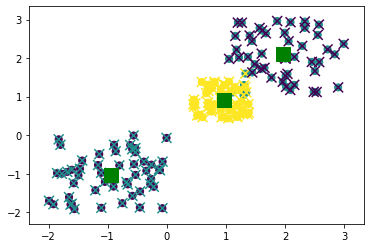

In [2]:
#Synthetic data
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(X)

print(Kmean.cluster_centers_)

# Plots original points
plt.scatter(X[ : , 0], X[ : , 1], s = 50, c=colors)
# Plots X labels after k-mens
plt.scatter(X[ : , 0], X[ : , 1], s = 100, marker='x', c=Kmean.labels_)

# Plots centroids
for cl in Kmean.cluster_centers_:
    plt.scatter(cl[0], cl[1], s=200, c='g', marker='s')
plt.show()


### Elbow method for determing K

https://pythonprogramminglanguage.com/kmeans-elbow-method/

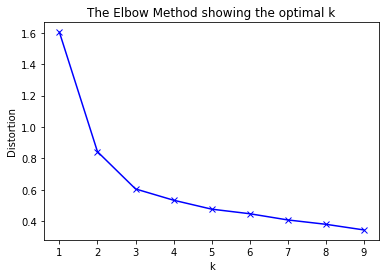

In [3]:
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    # calcualtes the distance between each point and each cluster center
    # takes the minimum of each calcaulation (hence the difference between point and ITS cluster center)
    # takes average of all distances
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## K-means on Gene Expression data

,tissue,batch,PC1,PC2,PC3,ACAD10,ACOT9,ACP5,ACSL3,ACTN1,...,VAMP8,VAT1,VCAN,VIM,VKORC1,WASL,WIPF1,YIF1A,ZFAND1,ZMYND8
0,GSM803615,cancer_leukemia,1,-0.056842,-0.044581,-0.113268,-0.225523,-0.657666,-0.719608,0.976008,...,1.187395,1.571835,1.622788,-1.602078,-0.891860,1.290564,-0.525940,0.497015,1.458386,0.802005
1,GSM803674,cancer_leukemia,1,-0.056585,-0.042994,-0.114095,-0.115336,-0.745160,-0.694094,0.943915,...,1.190114,1.507160,1.549506,-1.520655,-0.767165,1.285415,-0.468604,0.557008,1.471242,0.842532
2,GSM803733,cancer_leukemia,1,-0.055702,-0.045556,-0.112062,0.061519,0.074016,-0.465058,1.225343,...,1.169255,1.700852,1.275134,-1.434353,-0.975328,1.194626,-0.645405,0.517338,1.248210,0.639988
3,GSM803616,cancer_leukemia,1,-0.061005,-0.036062,-0.123295,-0.148417,0.195879,-0.766730,1.087944,...,1.087413,2.203975,1.310098,-1.630171,-1.488807,1.342042,-0.841403,0.333256,1.343742,1.135597
4,GSM803675,cancer_leukemia,1,-0.060836,-0.032265,-0.127681,-0.198627,0.117102,-0.464126,1.095090,...,1.014173,2.228343,1.243804,-1.485274,-1.432242,1.291582,-0.800714,0.296388,1.389916,1.119560
5,GSM803734,cancer_leukemia,1,-0.056634,-0.049184,-0.128937,-0.083067,0.694710,-0.342008,0.865687,...,1.198594,2.446558,1.446736,-1.461154,-1.272950,1.479403,-0.842010,0.261493,1.460462,1.348738
6,GSM803617,cancer_leukemia,1,-0.058637,-0.027791,-0.107388,-0.154221,0.820919,-0.552283,1.209606,...,0.994478,-1.006042,1.463557,-1.382737,-0.766139,1.273722,-0.477425,0.613683,1.214733,0.942707
7,GSM803676,cancer_leukemia,1,-0.058000,-0.029718,-0.105948,-0.213438,0.862094,-0.628550,1.167257,...,0.927651,-1.168307,1.382143,-1.391567,-0.808953,1.242841,-0.233058,0.570989,1.181966,1.041305
8,GSM803735,cancer_leukemia,1,-0.053656,-0.054039,-0.126916,0.104375,0.651555,-0.419143,0.803217,...,1.225416,2.133670,1.750576,-1.578978,-1.206945,1.073653,-0.701503,0.491342,1.058992,1.587902
9,GSM803618,cancer_leukemia,1,-0.061899,-0.064274,-0.104224,-0.081437,0.827006,-0.493754,0.311060,...,1.261329,1.723526,0.447215,-1.649586,-1.329464,1.751535,-0.383778,0.722915,1.602560,0.879687


,ACAD10,ACOT9,ACP5,ACSL3,ACTN1,ACTN4,ACVR2A,ADCK4,ADK,AGMAT,...,VAMP8,VAT1,VCAN,VIM,VKORC1,WASL,WIPF1,YIF1A,ZFAND1,ZMYND8
0,-0.113268,-0.225523,-0.657666,-0.719608,0.976008,1.111694,0.503365,-0.544117,-1.171410,1.642168,...,1.187395,1.571835,1.622788,-1.602078,-0.891860,1.290564,-0.525940,0.497015,1.458386,0.802005
1,-0.114095,-0.115336,-0.745160,-0.694094,0.943915,1.002691,0.541647,-0.107079,-1.157218,1.666202,...,1.190114,1.507160,1.549506,-1.520655,-0.767165,1.285415,-0.468604,0.557008,1.471242,0.842532
2,-0.112062,0.061519,0.074016,-0.465058,1.225343,0.800822,0.751530,-0.304991,-1.106253,1.829030,...,1.169255,1.700852,1.275134,-1.434353,-0.975328,1.194626,-0.645405,0.517338,1.248210,0.639988
3,-0.123295,-0.148417,0.195879,-0.766730,1.087944,1.520482,1.073094,-0.145891,-1.023316,1.796636,...,1.087413,2.203975,1.310098,-1.630171,-1.488807,1.342042,-0.841403,0.333256,1.343742,1.135597
4,-0.127681,-0.198627,0.117102,-0.464126,1.095090,1.549793,1.069821,0.029051,-1.166969,1.820661,...,1.014173,2.228343,1.243804,-1.485274,-1.432242,1.291582,-0.800714,0.296388,1.389916,1.119560
5,-0.128937,-0.083067,0.694710,-0.342008,0.865687,1.393348,1.056934,-0.321569,-1.235625,1.765723,...,1.198594,2.446558,1.446736,-1.461154,-1.272950,1.479403,-0.842010,0.261493,1.460462,1.348738
6,-0.107388,-0.154221,0.820919,-0.552283,1.209606,1.006519,0.385098,-0.079533,-1.053414,1.334310,...,0.994478,-1.006042,1.463557,-1.382737,-0.766139,1.273722,-0.477425,0.613683,1.214733,0.942707
7,-0.105948,-0.213438,0.862094,-0.628550,1.167257,1.036698,0.333438,-0.449753,-1.086598,1.311795,...,0.927651,-1.168307,1.382143,-1.391567,-0.808953,1.242841,-0.233058,0.570989,1.181966,1.041305
8,-0.126916,0.104375,0.651555,-0.419143,0.803217,1.201640,1.214298,0.505413,-0.928018,1.592744,...,1.225416,2.133670,1.750576,-1.578978,-1.206945,1.073653,-0.701503,0.491342,1.058992,1.587902
9,-0.104224,-0.081437,0.827006,-0.493754,0.311060,0.098200,0.192633,-0.071105,-1.103662,0.940588,...,1.261329,1.723526,0.447215,-1.649586,-1.329464,1.751535,-0.383778,0.722915,1.602560,0.879687


1     42
14    27
10    27
3     23
11    19
6      9
5      9
0      9
4      8
15     6
9      4
2      4
12     3
8      3
7      3
13     2
dtype: int64
cancer_non-small cell lung    26
cancer_melanoma               26
cancer_renal                  23
cancer_colon                  21
cancer_ovarian                21
cancer_leukemia               18
cancer_CNS                    18
cancer_breast                 15
normal_brain                   8
cancer_prostate                6
normal_blood                   6
normal_ovary                   2
normal_kidney                  2
normal_lung                    2
normal_prostate                2
normal_skin                    2
Name: batch, dtype: int64


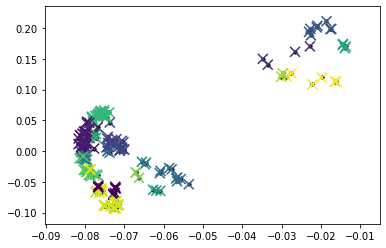

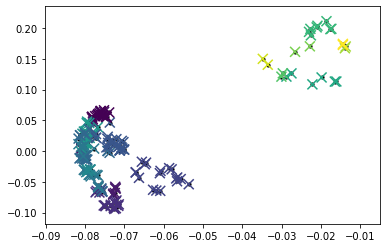

In [4]:
display(nci60)
display(expr)
# fit the data, there is 9 tissue types
Kmean = KMeans(n_clusters=16)
Kmean.fit(expr)
# see how many rows ended up with each labels
print(pd.Series(Kmean.labels_).value_counts())
print(nci60.batch.value_counts())

# # how we do visulaize this?

plt.scatter(nci60.PC2, nci60.PC3, s = 10, c='black')
plt.scatter(nci60.PC2, nci60.PC3, s = 100, marker='x', c=Kmean.labels_)
plt.show()

plt.scatter(nci60.PC2, nci60.PC3, s = 10, c='black')
plt.scatter(nci60.PC2, nci60.PC3, s = 100, marker='x', c=nci60.batch.astype('category').cat.codes)
plt.show()

# Hierarchical Clustering

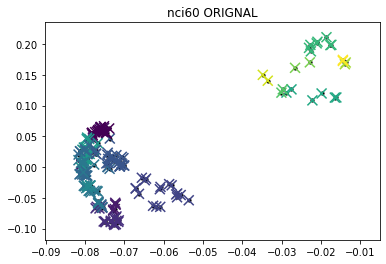

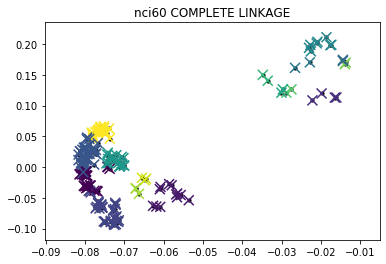

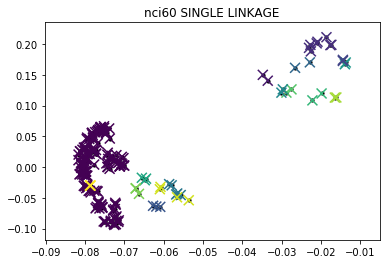

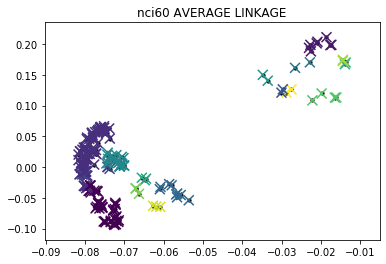

array([[-0.58614565, -0.36467805],
       [-0.90224172, -1.33496352],
       [-0.56364119, -0.01041619],
       [-1.16423667, -0.77561396],
       [-1.68449171, -0.95266979],
       [-1.77542656, -1.00239811],
       [-1.60880872, -1.78030268],
       [-1.49470448, -1.04238976],
       [-0.26301732, -0.76500631],
       [-0.07305393, -0.68794648],
       [-1.10846992, -1.8851535 ],
       [-0.55698241, -0.75416486],
       [-0.00628236, -0.07167975],
       [-0.80483157, -0.78645138],
       [-0.68348971, -1.21672748],
       [-0.53034776, -1.03105704],
       [-0.75248915, -1.76616106],
       [-0.38960591, -0.68625127],
       [-0.34755626, -0.92428656],
       [-1.85762719, -0.9855118 ],
       [-0.07566832, -1.89662912],
       [-0.45285802, -1.4607254 ],
       [-0.2824667 , -1.26440686],
       [-1.82988391, -0.10859332],
       [-0.53338648, -0.3349189 ],
       [-0.66214102, -1.27882708],
       [-0.13333926, -0.88581654],
       [-1.65465471, -1.60938094],
       [-1.04998091,

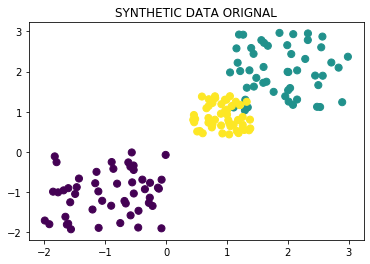

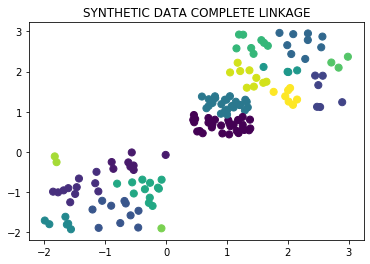

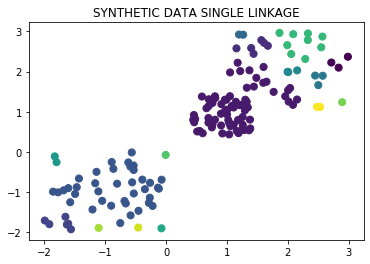

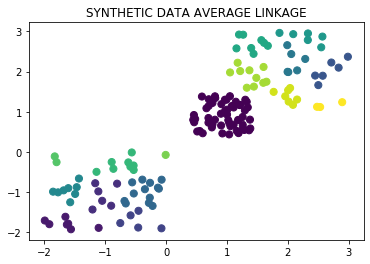

In [5]:
from sklearn.cluster import AgglomerativeClustering
single = AgglomerativeClustering(n_clusters=16, linkage='single').fit(expr)
complete = AgglomerativeClustering(n_clusters=16, linkage='complete').fit(expr)
average = AgglomerativeClustering(n_clusters=16, linkage='average').fit(expr)


plt.scatter(nci60.PC2, nci60.PC3, s = 10, c='black')
plt.scatter(nci60.PC2, nci60.PC3, s = 100, marker='x', c=nci60.batch.astype('category').cat.codes)
plt.title("nci60 ORIGNAL")
plt.show()

plt.scatter(nci60.PC2, nci60.PC3, s = 10, c='black')
plt.scatter(nci60.PC2, nci60.PC3, s = 100, marker='x', c=complete.labels_)
plt.title("nci60 COMPLETE LINKAGE")
plt.show()

plt.scatter(nci60.PC2, nci60.PC3, s = 10, c='black')
plt.scatter(nci60.PC2, nci60.PC3, s = 100, marker='x', c=single.labels_)
plt.title("nci60 SINGLE LINKAGE")
plt.show()

plt.scatter(nci60.PC2, nci60.PC3, s = 10, c='black')
plt.scatter(nci60.PC2, nci60.PC3, s = 100, marker='x', c=average.labels_)
plt.title("nci60 AVERAGE LINKAGE")
plt.show()


# ON YOU OWN - Explore for synthetic data set (comment nci60 plots and uncomment the ones below)
display(X)
single = AgglomerativeClustering(n_clusters=16, linkage='single').fit(X)
complete = AgglomerativeClustering(n_clusters=16, linkage='complete').fit(X)
average = AgglomerativeClustering(n_clusters=16, linkage='average').fit(X)

#### SYNTHETIC DATA ####
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = colors)
plt.title("SYNTHETIC DATA ORIGNAL")
plt.show()

plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = complete.labels_)
plt.title("SYNTHETIC DATA COMPLETE LINKAGE")
plt.show()

plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = single.labels_)
plt.title("SYNTHETIC DATA SINGLE LINKAGE")
plt.show()

plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = average.labels_)
plt.title("SYNTHETIC DATA AVERAGE LINKAGE")
plt.show()

# reset assigments back to nci60
from sklearn.cluster import AgglomerativeClustering
single = AgglomerativeClustering(n_clusters=16, linkage='single').fit(expr)
complete = AgglomerativeClustering(n_clusters=16, linkage='complete').fit(expr)
average = AgglomerativeClustering(n_clusters=16, linkage='average').fit(expr)



### Hierarchical Clustering with Scipy

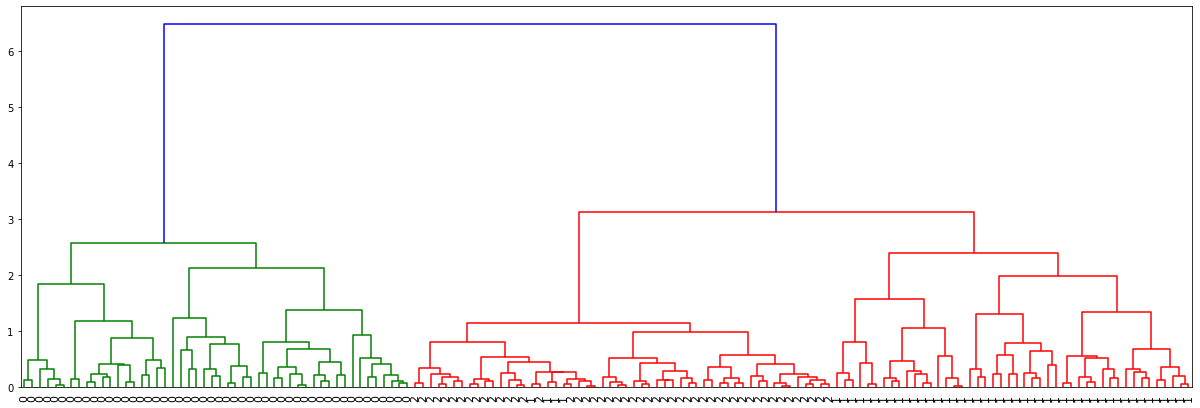

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
# cannot choose number of clusters
Z = linkage(expr,'complete')
# display(Z)
# plt.figure(figsize=(21, 7))  
# dendrogram(Z,orientation='top',
#             labels=nci60.tissue,
#             distance_sort='descending',
#             leaf_font_size='11',
#             show_leaf_counts=True) 
# plt.show()

# synthetic data
Z = linkage(X,'complete')
plt.figure(figsize=(21, 7))  
dendrogram(Z,orientation='top',
            labels=colors,
            distance_sort='descending',
            leaf_font_size='11',
            show_leaf_counts=True) 
plt.show()

# reset back to nci60
Z = linkage(expr,'complete')


## Bi-Clustering for Omics data

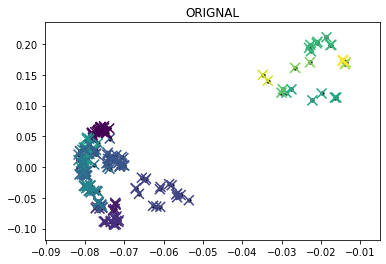

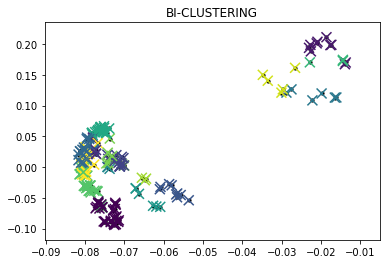

In [7]:
from sklearn.cluster import SpectralBiclustering
bicluster = SpectralBiclustering(n_clusters=16, random_state=0).fit(expr)

plt.scatter(nci60.PC2, nci60.PC3, s = 10, c='black')
plt.scatter(nci60.PC2, nci60.PC3, s = 100, marker='x', c=nci60.batch.astype('category').cat.codes)
plt.title("ORIGNAL")
plt.show()

plt.scatter(nci60.PC2, nci60.PC3, s = 10, c='black')
plt.scatter(nci60.PC2, nci60.PC3, s = 100, marker='x', c=bicluster.row_labels_)
plt.title("BI-CLUSTERING")
plt.show()


## Lab

Try unsupervised learning on the synthetic dataset in Orange

Use code below for the python data widget

![alt text](kmeans.png "Workflow")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Orange.data import Domain, Table
##### clustering (unsupervised/descrete) ####
# radmon generated data  
# Generating 3 destinct cluster, 2 of them slightly overlapping
X = -2 * np.random.rand(50,2)
X1 = 1 + 2 * np.random.rand(50,2)
X2 = 0.4 + np.random.rand(50,2)

X = np.append(X,X1,axis=0)
X = np.append(X,X2,axis=0)
colors = [0]*50+[1]*50+[2]*50
dfX = pd.DataFrame(X)
dfX['color'] = colors

out_data = Table(dfX)